In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd 
import random
import statistics
import seaborn as sns 
import collections
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)

In [2]:
np.random.seed(0)
X = np.random.normal(0, 5, 10000)
epsilon = np.random.normal(0, 1, 10000)

beta_0 = 100
beta_1 = 0.3

Y = beta_0 + beta_1*X + epsilon

This note is about the logic behind the beta hypothesis testing. 

We usually run a hypothesis test that tests whether the true population value is equal to a hypothesized value or not using a sample. To test that, we use t-statistics and correponding p-values. Here I am going to explain how t-stats and p-values are valid for testing the hypothesis. 

First of all, let's generate a hypothetical population data. 

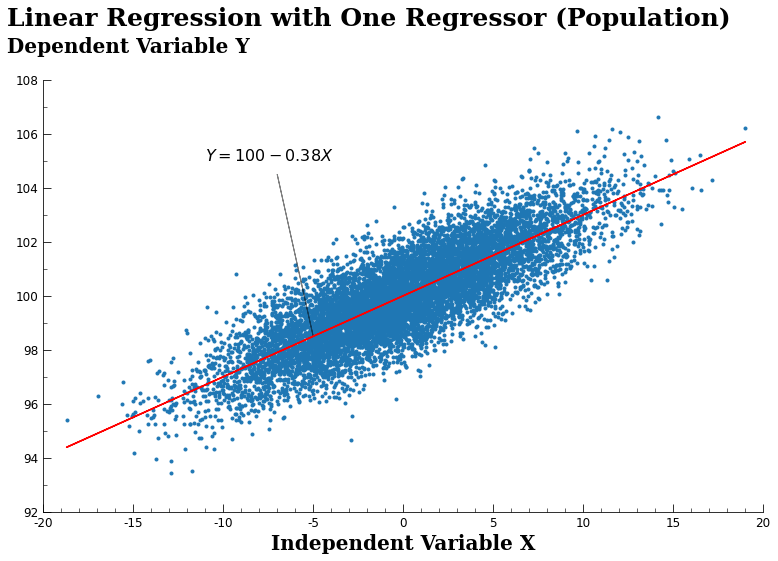

In [3]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_axes([0,0,1,1])

ax.scatter(X, Y, marker=".")
ax.plot(X, beta_0 + beta_1*X, color="red")

ax.xaxis.set_major_locator(MultipleLocator(5))
ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
ax.xaxis.set_minor_locator(MultipleLocator(1))

ax.yaxis.set_major_locator(MultipleLocator(2))
ax.yaxis.set_major_formatter(FormatStrFormatter('%d'))
ax.yaxis.set_minor_locator(MultipleLocator(1))

ax.tick_params(axis='x', which="major", direction='in', pad=5, length=8, labelsize=12)
ax.tick_params(axis='x', which="minor", direction='in', length=4, labelsize=12)

ax.tick_params(axis='y', which="major", direction='in', pad=5, length=8, labelsize=12)
ax.tick_params(axis='y', which="minor", direction='in', length=4, labelsize=12)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_ylim(92, 108)
ax.set_xlim(-20, 20)

ax.set_xlabel("Independent Variable X", fontfamily='serif', fontsize=20, fontweight="bold")
ax.text(-22,109,'Dependent Variable Y', fontfamily='serif', fontsize=20, ma='center', fontweight='bold')
ax.text(-22,110,'Linear Regression with One Regressor (Population)', fontfamily='serif', fontsize=25, ma='center', fontweight='bold')

ax.arrow(-5, 98.5, -2, 6, alpha=0.5)
ax.text(-11, 105, r'$Y=100-0.38X$', fontsize=16)

plt.show()

In [4]:
xy_observation = np.array([X.tolist(), Y.tolist()])
xy_observation = xy_observation.transpose()
print("The first column is X and the second column is Y.")
print()
print(xy_observation)

The first column is X and the second column is Y.

[[  8.82026173 102.44396149]
 [  2.00078604  99.76700481]
 [  4.89368992 103.20170722]
 ...
 [  2.58436089 100.71804902]
 [ -0.16460347  98.8916877 ]
 [  6.49055716 101.62063871]]


### Still have to correct this staring from here: I did it wrong. I generated the z-distribution based on the true population mean. 

In the previous note (note_1), I have shown you how a drawn sample can estimate the true population coefficients, beta_1 and beta_0. The estimates are the beta_0_hat and the beta_1_hat. But the estiamtes could be different from our hypothesized values for the population coefficients. We can probably hypothesize that the true population coefficient for beta_1 is zero. We can also hypothesize that the coefficient for beta_1 is some other value. But for the sake of example, let's hypothesize that beta_1 = 0.  

For examples let's set up a hypothesis for Beta_1. 

We have to test if the estimates are statistically significant. In other words, it's testing if the estimates are not equal to the value, zero.   

H0: Beta_1 = 0 

HA: Beta_1 != 0 

And we are told that if the t_statistic for the estimate is bigger than 1.96 or smaller than -1.96, then we reject the null hypothesis. But what does that mean? 

The logic behind this t-test is the following. In the previous example, we have drawn a sample size of 100. And let's assume that we take infinitiely many samples in size of 100. And if we were to plot the frequency distribution of the coefficients that we get from different sampels, then we get something like below. It looks normal. In fact, it fits quite well under the normal pdf. 

In [5]:
beta_0_hat_list = []
beta_1_hat_list = []

for i in range(5000):
    inx = np.random.randint(10000, size=100)
    sample = xy_observation[inx]
    sample = sm.add_constant(sample)
    
    sample_results = sm.OLS(sample[:,2], sample[:,0:2]).fit()
    beta_0_hat = sample_results.params[0]
    beta_1_hat = sample_results.params[1]
    
    beta_0_hat_list.append(beta_0_hat)
    beta_1_hat_list.append(beta_1_hat)

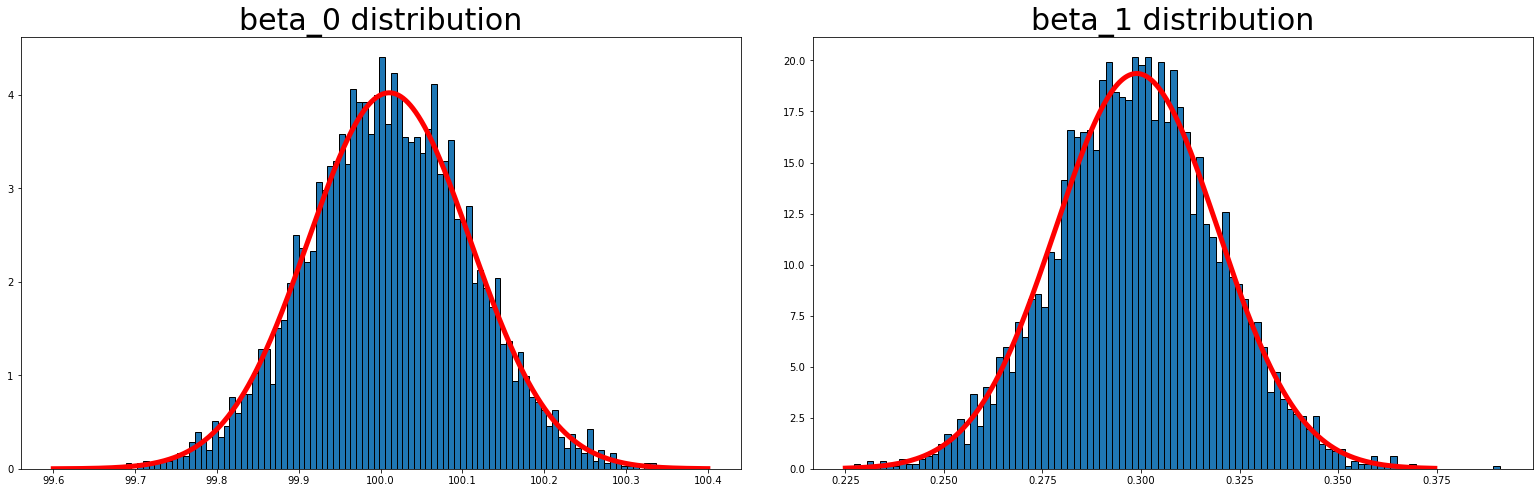

In [6]:
fig = plt.figure(figsize=(10,6))

x_0 = np.arange(99.6, 100.4, .0005)
x_1 = np.arange(0.225, 0.375, .0005)

mu_beta_0 = np.mean(beta_0_hat_list)
mu_beta_1 = np.mean(beta_1_hat_list)

std_beta_0 = np.std(beta_0_hat_list)
std_beta_1 = np.std(beta_1_hat_list)


ax_0 = fig.add_axes([0,0,1,1])
ax_1 = fig.add_axes([1.1, 0, 1, 1])


ax_0.hist(beta_0_hat_list, bins=100, ec="black", density=True)
ax_0.plot(x_0, stats.norm.pdf(x_0, mu_beta_0, std_beta_0), color='red', lw=5)

ax_1.hist(beta_1_hat_list, bins=100, ec="black", density=True)
ax_1.plot(x_1, stats.norm.pdf(x_1, mu_beta_1, std_beta_1), color='red', lw=5)

ax_0.set_title("beta_0 distribution", fontsize=30)
ax_1.set_title("beta_1 distribution", fontsize=30)

plt.show()

In [7]:
# Here, I am converting each values of beta_0_hat to z_statistic values.
z_stat_beta_0 = ((np.array([beta_0_hat_list])-mu_beta_0)/std_beta_0).tolist()[0]
# Here, I am converting each values of beta_1_hat to z_statistic values.
z_stat_beta_1 = ((np.array([beta_1_hat_list])-mu_beta_1)/std_beta_1).tolist()[0]

Now, let's turn each estimate into z_values by subtractring each by the mean of the estimates and divide each by the standard deviation of the estimates. We get the the distribution like below. It looks same as the ones above but if you look carefully, the y-axis and the x-axis values are different. 

When we turn each estimates into z_values and plot the distribution, we know that the distribution has the mean of zero and the standard deviation of 1, while maintaining the normal shape. So it becomes the z-distribution (AKA Standard Normal Distribution) which is same as the normal distribution with mean value 0 and standard deviation of 1. 

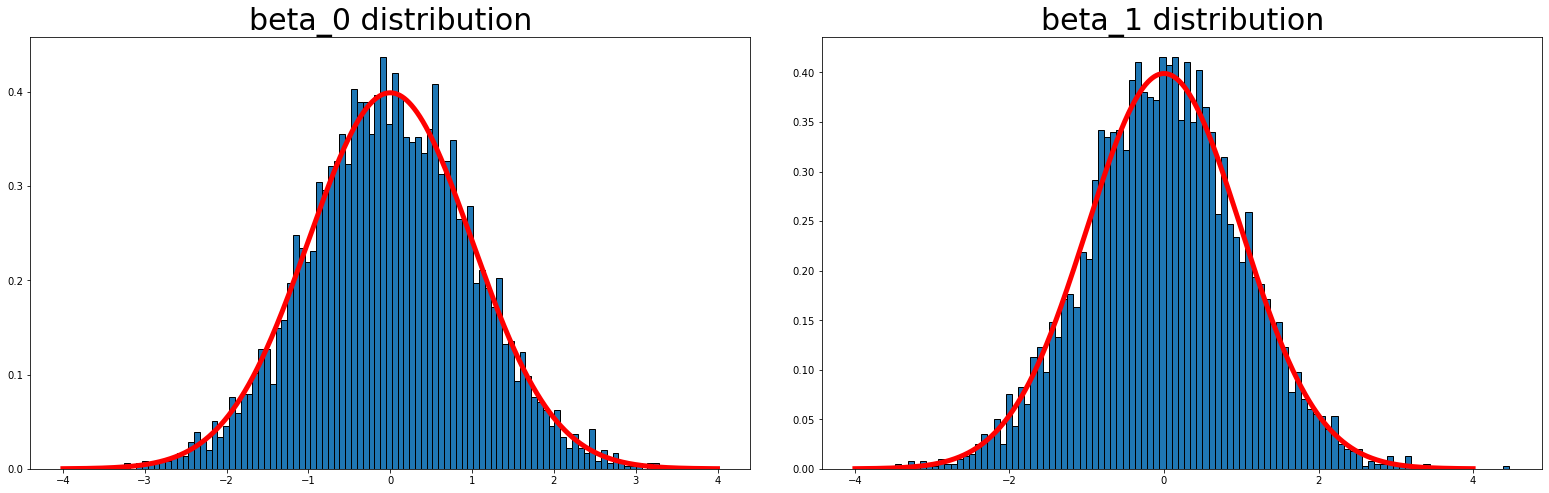

In [8]:
fig = plt.figure(figsize=(10,6))

x_0 = np.arange(-4, 4, .0005)
x_1 = np.arange(-4, 4, .0005)

mu_beta_0 = np.mean(z_stat_beta_0)
mu_beta_1 = np.mean(z_stat_beta_1)

std_beta_0 = np.std(z_stat_beta_0)
std_beta_1 = np.std(z_stat_beta_1)


ax_0 = fig.add_axes([0,0,1,1])
ax_1 = fig.add_axes([1.1, 0, 1, 1])


ax_0.hist(z_stat_beta_0, bins=100, ec="black", density=True)
ax_0.plot(x_0, stats.norm.pdf(x_0, mu_beta_0, std_beta_0), color='red', lw=5)

ax_1.hist(z_stat_beta_1, bins=100, ec="black", density=True)
ax_1.plot(x_1, stats.norm.pdf(x_1, mu_beta_1, std_beta_1), color='red', lw=5)

ax_0.set_title("beta_0 distribution", fontsize=30)
ax_1.set_title("beta_1 distribution", fontsize=30)

plt.show()

For more clear demonstration, I am going to take the beta_1 distribution as an example. I have turned the beta_1 distribution into z_distribution. And it looks as below. In the hypothesis testing, we usually set the significance level of 5%. If we run a two tailed test, each tail takes the probability of 2.5%. If our estimate 

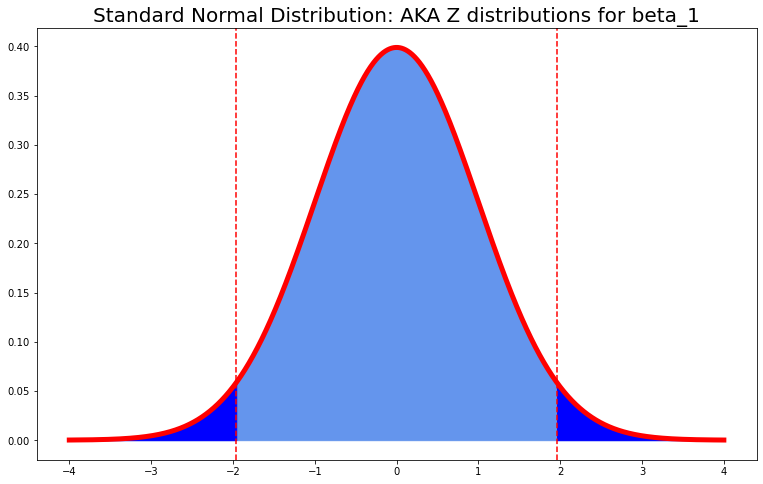

In [9]:
fig = plt.figure(figsize=(10,6))

x = np.arange(-4, 4, 0.0005)

ax = fig.add_axes([0,0,1,1])

ax.plot(x, stats.norm.pdf(x,0,1), color="red", lw=5)

ax.axvline(1.96, color='red', linestyle="--")
ax.axvline(-1.96, color='red', linestyle="--")

right_tail_x = np.arange(1.96, 4, 1/20)
right_tail_y = stats.norm.pdf(right_tail_x, 0, 1)
left_tail_x = np.arange(-1.96, -4, -1/20)
left_tail_y = stats.norm.pdf(left_tail_x, 0, 1)


ax.fill_between(x, stats.norm.pdf(x,0,1), color="cornflowerblue")

ax.fill_between(right_tail_x, right_tail_y, color="blue")
ax.fill_between(left_tail_x, left_tail_y, color="blue")


ax.set_title("Standard Normal Distribution: AKA Z distributions for beta_1", fontsize=20)


plt.show()

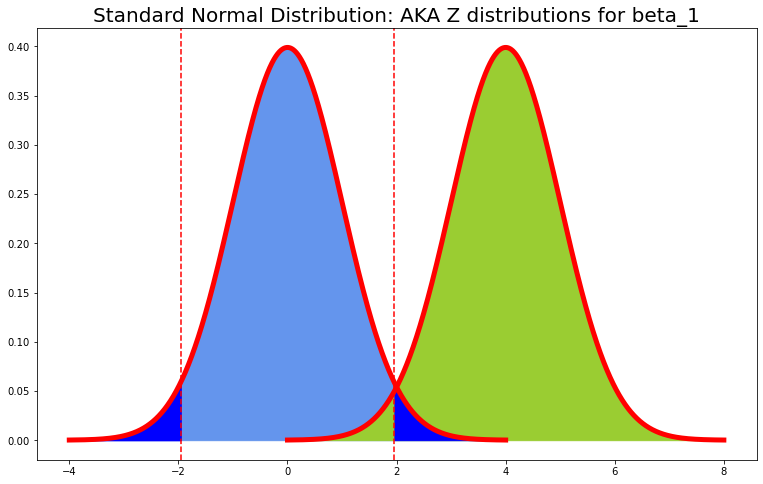

In [10]:
fig = plt.figure(figsize=(10,6))

x_1 = np.arange(-4, 4, 0.0005)
x_2 = np.arange(0, 8, 0.0005)


ax = fig.add_axes([0,0,1,1])

ax.plot(x_1, stats.norm.pdf(x_1,0,1), color="red", lw=5)
ax.plot(x_2, stats.norm.pdf(x_2,4,1), color="red", lw=5)


ax.axvline(1.96, color='red', linestyle="--")
ax.axvline(-1.96, color='red', linestyle="--")

right_tail_x = np.arange(1.96, 4, 1/20)
right_tail_y = stats.norm.pdf(right_tail_x, 0, 1)
left_tail_x = np.arange(-1.96, -4, -1/20)
left_tail_y = stats.norm.pdf(left_tail_x, 0, 1)


ax.fill_between(x_1, stats.norm.pdf(x_1,0,1), color="cornflowerblue")
ax.fill_between(x_2, stats.norm.pdf(x_1,0,1), color="yellowgreen")



ax.fill_between(right_tail_x, right_tail_y, color="blue")
ax.fill_between(left_tail_x, left_tail_y, color="blue")


ax.fill_between(left_tail_x, left_tail_y, color="blue")


ax.set_title("Standard Normal Distribution: AKA Z distributions for beta_1", fontsize=20)


plt.show()

In [13]:
np.cov(beta_0_hat_list, beta_1_hat_list)

array([[9.84792690e-03, 5.30392836e-05],
       [5.30392836e-05, 4.24762584e-04]])

Looks like beta_0 and beta_1 has 0 covariance. Can we test this using F-test? I think so. 